In [115]:
import pandas as pd
import requests
import urllib3
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from pandas.api.types import CategoricalDtype

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)


In [145]:
auth_url = "https://www.strava.com/oauth/token"
activites_url = "https://www.strava.com/api/v3/athlete/activities"

clientID = "73092"
client_secret = "7ce9c1a9ef12c146f5e3e25bc5761e2d7c6e7009"
code = "52ec5853b048a139d88b4754b2783c7753c9c1e8"
refresh_tok = "24507a9c490400cc0f281775ba0ee7b1db1d2677"
access_tok = "ccb217b4c599b9a15b6550cbd1d2bca2986c937a"

payload = {
    'client_id': "73092",
    'client_secret': '7ce9c1a9ef12c146f5e3e25bc5761e2d7c6e7009',
    'refresh_token': '24507a9c490400cc0f281775ba0ee7b1db1d2677',
    'grant_type': "refresh_token",
    'f': 'json'
}

print("Requesting Token...\n")
res = requests.post(auth_url, data=payload, verify=False)

access_token = res.json()['access_token']
print("Access Token = {}\n".format(access_token))

header = {'Authorization': 'Bearer ' + access_token}
param = {'per_page': 200, 'page': 1}
my_dataset = requests.get(activites_url, headers=header, params=param).json()

# def getActivity(actID):
#     header = {'Authorization': 'Bearer ' + access_token}
#     activity = requests.get(activites_url+'/'+str(actID)+'?'+access_token).json()
#     print(activity)
#     activityPD = pd.json_normalize(activity)
#     return activityPD

# singleAct = getActivity(6088673215)

#print(my_dataset)
#print(my_dataset[0]["name"])
#print(my_dataset[0]["map"]["summary_polyline"])

activities = pd.json_normalize(my_dataset)
activities.to_csv("activities.csv")

Requesting Token...

Access Token = ccb217b4c599b9a15b6550cbd1d2bca2986c937a

{'message': 'Record Not Found', 'errors': [{'resource': 'resource', 'field': 'path', 'code': 'invalid'}]}


In [143]:
#activities = pd.json_normalize(my_dataset)
print(activities.columns, activities.shape) #See a list of all columns in the table
#activities.shape #See the dimensions of the table.
#print(activities['start_date'])

Index(['resource_state', 'name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'type', 'workout_type', 'id', 'external_id',
       'upload_id', 'start_date', 'start_date_local', 'timezone', 'utc_offset',
       'start_latlng', 'end_latlng', 'location_city', 'location_state',
       'location_country', 'start_latitude', 'start_longitude',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'trainer', 'commute', 'manual', 'private', 'visibility',
       'flagged', 'gear_id', 'from_accepted_tag', 'upload_id_str',
       'average_speed', 'max_speed', 'average_cadence', 'average_watts',
       'weighted_average_watts', 'kilojoules', 'device_watts', 'has_heartrate',
       'average_heartrate', 'max_heartrate', 'heartrate_opt_out',
       'display_hide_heartrate_option', 'max_watts', 'pr_count',
       'total_photo_count', 'has_kudoed', 'suffer_score', 'athlete.id',
       'athlete.resource_state', 'map.id', 'map.summa

In [144]:
cols = ['name','id', 'upload_id', 'type', 'distance', 'moving_time',   
         'average_speed', 'average_heartrate','max_speed','average_watts',
         'weighted_average_watts', 'kilojoules','total_elevation_gain',
         'start_date_local','average_temp','gear_id','map.summary_polyline','commute',
         'workout_type'
       ]

act = activities[cols]
#activities['type'].value_counts().plot(kind = 'bar')

activities['start_date_local'] = pd.to_datetime(activities['start_date_local'])
#activities['start_time'] = activities['start_date_local'].dt.time
#activities['start_date_local'] = activities['start_date_local'].dt.date
act.head(5)

,name,id,upload_id,type,distance,moving_time,average_speed,average_heartrate,max_speed,average_watts,weighted_average_watts,kilojoules,total_elevation_gain,start_date_local,average_temp,gear_id,map.summary_polyline,commute,workout_type
0,El Cajon,6106622067,6489560297,Ride,34229.2,4500,7.606,168.7,10.6,219.6,230.0,988.3,0.0,2021-10-13T04:44:34Z,NaN,b5607776,None,False,12.0
1,More leaves!,6088673215,6470476852,Ride,182712.0,27995,6.527,149.7,20.6,178.4,199.0,4993.1,3257.0,2021-10-09T03:49:39Z,12.0,b8481130,{fnqFnou_ScJz@[~hBihAnw@_n@jNic@bo@uG}EePbVUrz...,False,10.0
2,Afternoon Ride,6059600354,6439878850,Ride,3309.9,1016,3.258,127.8,5.3,31.0,NaN,31.5,20.5,2021-10-03T13:17:32Z,NaN,b7799528,ofnqFvwt_SAeDEcBBoGLaBR{@B{AA}BF_A@BA@EyC@oLCm...,False,10.0
3,Early Morning Leaf Peeping,6058721904,6438947650,Ride,128968.0,20190,6.388,138.6,20.7,172.2,187.0,3477.2,2194.0,2021-10-03T04:15:50Z,9.0,b8481130,{fnqFvou_SaJr@SlhBohAxw@ya@fH}JfEa^bg@wCr@r@xB...,False,10.0
4,Family ride,6054450635,6434456127,Ride,4655.1,1248,3.730,153.9,6.4,30.6,NaN,38.1,24.8,2021-10-02T15:09:46Z,NaN,b7799528,ifnqF|wt_SAeABu@EwMf@eCE_MBuDCgQCuEFoFEeX@cHG}...,False,10.0


In [124]:
rides = act.loc[act['type'] == 'Ride']
#print(rides.info)
rides = rides[rides['weighted_average_watts'] > 0] #Scrub the no-power rides
rides = rides[rides['commute']==False]
rides.info
#sns.set(style="ticks", context="talk")
#sns.regplot(x='moving_time', y = 'weighted_average_watts', data = rides).set_title("Power vs. Time")

<bound method DataFrame.info of                            name   upload_id  type  distance  moving_time  \
0                      El Cajon  6489560297  Ride   34229.2         4500   
1                  More leaves!  6470476852  Ride  182712.0        27995   
3    Early Morning Leaf Peeping  6438947650  Ride  128968.0        20190   
5                  Morning Ride  6434069444  Ride  189226.0        28804   
6                      White -1  6416453934  Ride   33910.9         3600   
..                          ...         ...   ...       ...          ...   
195                Morning Ride  4813645947  Ride  113973.0        14988   
196               New bike day!  4809576753  Ride  155534.0        21400   
197                Free Ride 75  4798486033  Ride   29509.1         3900   
198                Free Ride 75  4792715227  Ride   13619.4         1803   
199                    Winchell  4786763639  Ride   33849.1         4605   

     average_speed  average_heartrate  max_speed  avera

 
-2.853 x + 227.4


/var/folders/hk/8yhk12y94z7fwn097_d9fzjh0000gp/T/ipykernel_31080/3526115763.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


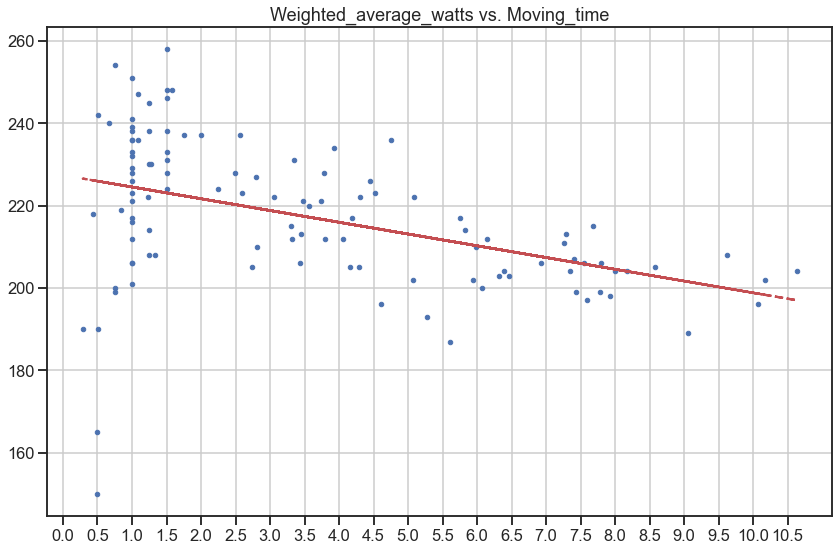

In [ ]:
fig = plt.figure(figsize=(12,8)) #create overall container
ax1 = fig.add_subplot(111) #add a 1 by 1 plot to the figure

xval = 'moving_time'
yval = 'weighted_average_watts'
x = np.asarray(rides[xval])  #convert data to numpy array
y = np.asarray(rides[yval])

x = x/60/60 #unit conversion

ax1.plot(x, y,'.') #plot data points in scatter plot on ax1
xmin, xmax = ax1.get_xlim()
ax1.set_xticks(np.arange(0, np.round(xmax), 0.5)) 
ax1.grid()
ax1.set_title((yval.capitalize() + " vs. " + xval.capitalize()))
#ax1.set_ylim([0,5])
#add trend line
z=np.polyfit(x,y,1)
p=np.poly1d(z)
print(p)
plt.plot(x,p(x),'r--')
#format the figure and display
#fig.autofmt_xdate(rotation=45)
fig.tight_layout()
fig.show()

<AxesSubplot:xlabel='DayofWeekName', ylabel='DayHour'>

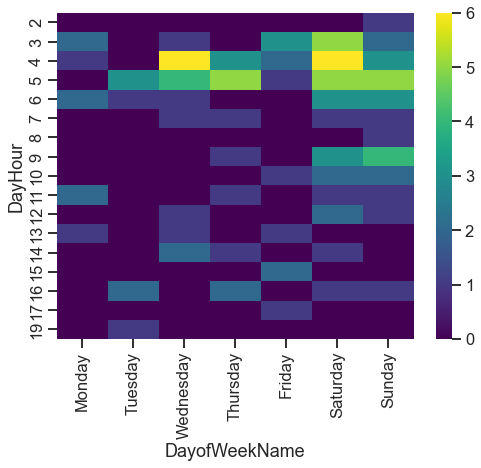

In [ ]:
def countRows(rows):
    return len(rows)
rides['start_date_local'] = pd.to_datetime(rides['start_date_local'],infer_datetime_format=True)#"%Y-%m-%dT%H:%M:%SZ")#+"%m/%d/%Y %H:%M:%S") #2021-10-13T10:44:34Z
rides['DayofWeekNum'] = rides['start_date_local'].dt.dayofweek
rides['DayofWeekName'] = rides['start_date_local'].dt.day_name()

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
rides['DayofWeekName'] = rides['DayofWeekName'].astype(cat_type)
rides['DayHour'] = rides['start_date_local'].dt.hour
rides['DayNum'] = rides['start_date_local'].dt.dayofyear
by_hour_weekday = rides.groupby('DayHour DayofWeekName'.split()).apply(countRows).unstack()
by_hour_weekday = by_hour_weekday.fillna(0)

plt.figure(figsize = (8,6))
sns.heatmap(by_hour_weekday,cmap = 'viridis')